In [ ]:
%cd ../

In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db',
                                     mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100)

01/24/2020 13:39:02 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 13:39:13 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 13:39:23 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 13:39:34 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
01/24/2020 13:39:44 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

In [7]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=15, use_cuda=True, checkpoint_steps=500, blocks_batch_size=8,
                    blocks_filter=affvids_db.inference_filter(training=True))

01/24/2020 13:51:00 [Epoch 1] (33422ms) Posterior free-energy 2.78780467e+09
01/24/2020 13:51:00 Saving checkpoint...
01/24/2020 13:51:33 [Epoch 2] (32611ms) Posterior free-energy 2.60953062e+09
01/24/2020 13:52:05 [Epoch 3] (32581ms) Posterior free-energy 2.47717606e+09
01/24/2020 13:52:38 [Epoch 4] (32691ms) Posterior free-energy 2.35838771e+09
01/24/2020 13:53:11 [Epoch 5] (32524ms) Posterior free-energy 2.29265664e+09
01/24/2020 13:53:43 [Epoch 6] (32656ms) Posterior free-energy 2.23633792e+09
01/24/2020 13:54:16 [Epoch 7] (32713ms) Posterior free-energy 2.19120742e+09
01/24/2020 13:54:49 [Epoch 8] (32725ms) Posterior free-energy 2.15891456e+09
01/24/2020 13:55:21 [Epoch 9] (32714ms) Posterior free-energy 2.13391462e+09
01/24/2020 13:55:54 [Epoch 10] (32834ms) Posterior free-energy 2.11237798e+09
01/24/2020 13:56:27 [Epoch 11] (32808ms) Posterior free-energy 2.09376205e+09
01/24/2020 13:57:00 [Epoch 12] (32859ms) Posterior free-energy 2.08016077e+09
01/24/2020 13:57:33 [Epoch 13] (

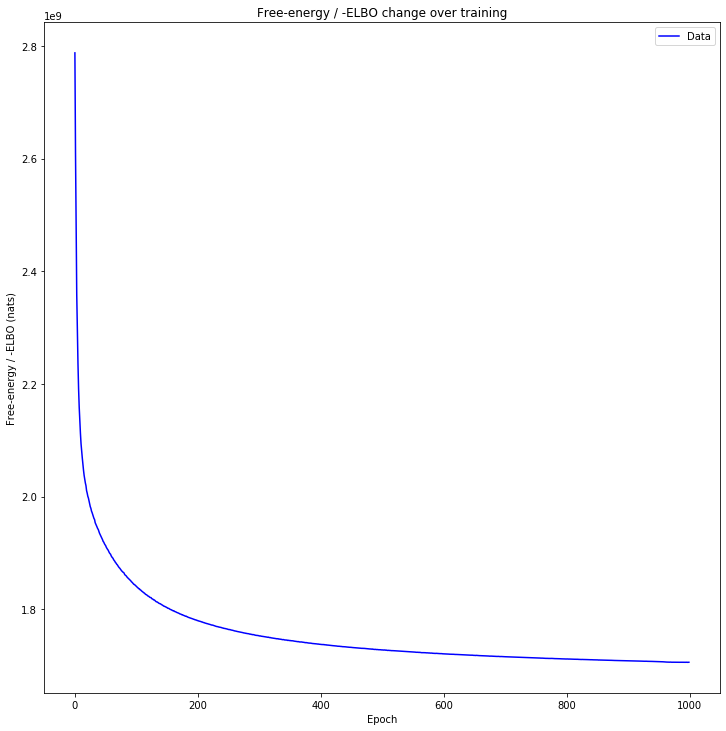

In [8]:
utils.plot_losses(losses)

In [9]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

01/24/2020 23:07:49 Plotting factors for Participant 5, run 3


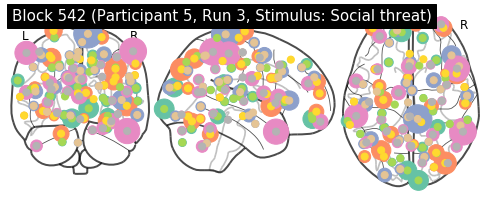

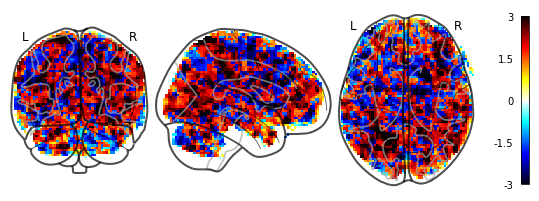

01/24/2020 23:07:56 Reconstruction Error (Frobenius Norm): 1.52482385e+03 out of 1.57909094e+03


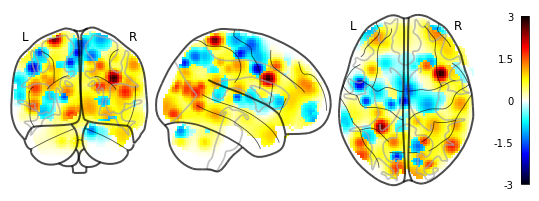

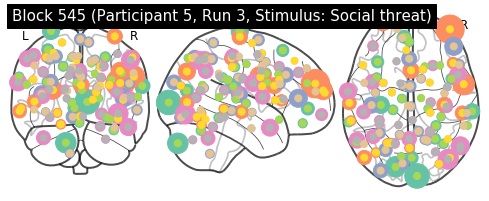

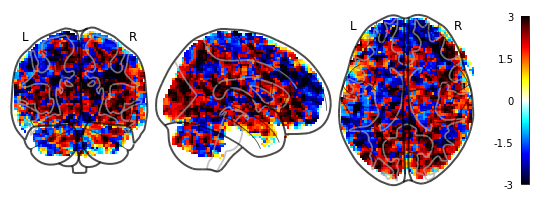

01/24/2020 23:08:01 Reconstruction Error (Frobenius Norm): 1.35807544e+03 out of 1.50190845e+03


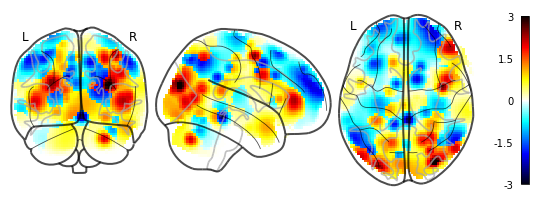

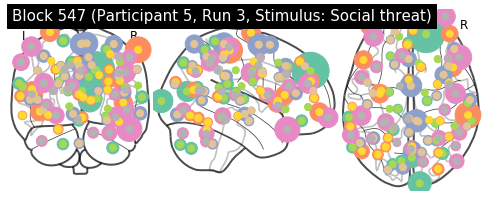

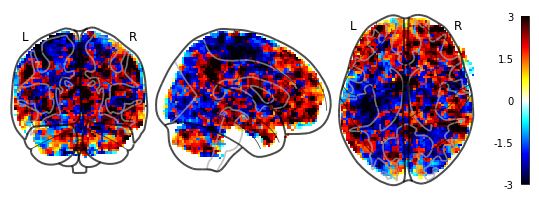

01/24/2020 23:08:05 Reconstruction Error (Frobenius Norm): 1.61293665e+03 out of 1.51530591e+03


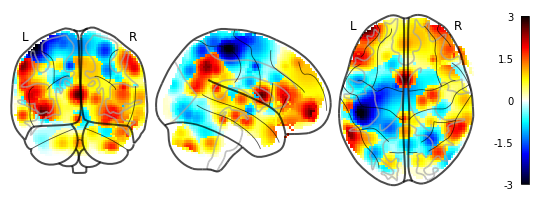

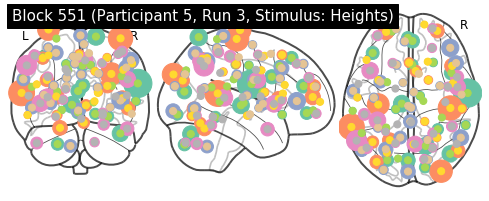

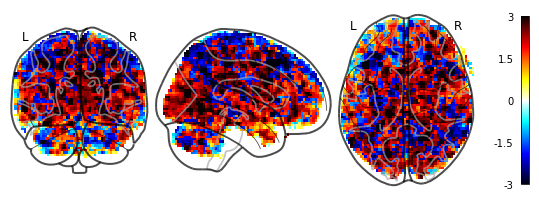

01/24/2020 23:08:10 Reconstruction Error (Frobenius Norm): 1.40488586e+03 out of 1.40692432e+03


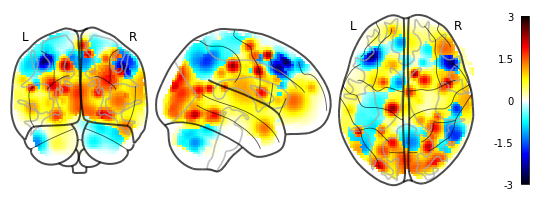

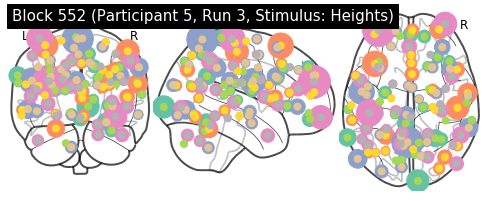

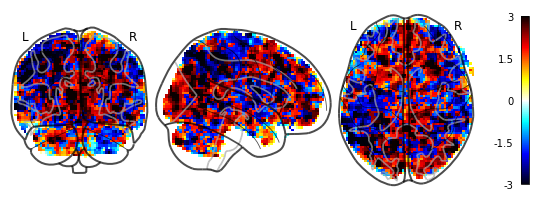

01/24/2020 23:08:14 Reconstruction Error (Frobenius Norm): 1.45745605e+03 out of 1.58722644e+03


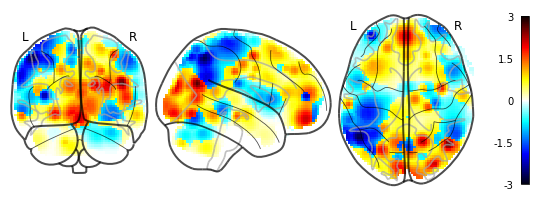

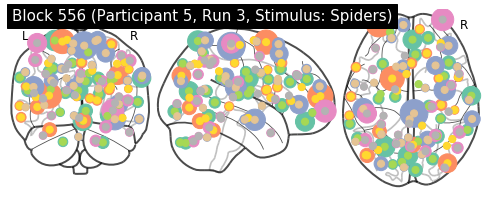

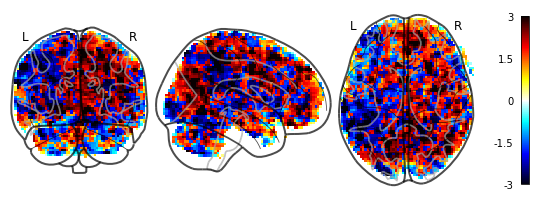

01/24/2020 23:08:19 Reconstruction Error (Frobenius Norm): 1.33759595e+03 out of 1.33398425e+03


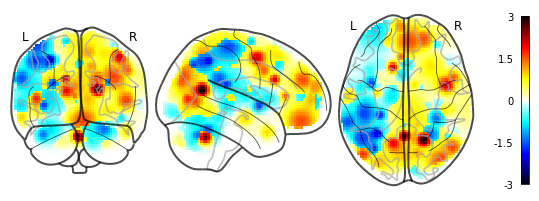

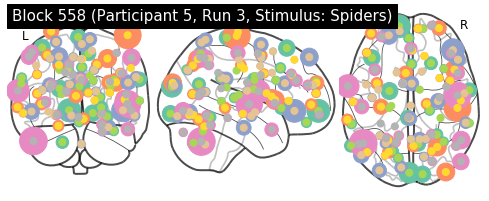

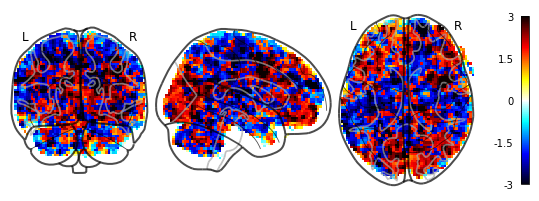

01/24/2020 23:08:23 Reconstruction Error (Frobenius Norm): 1.46716992e+03 out of 1.54964136e+03


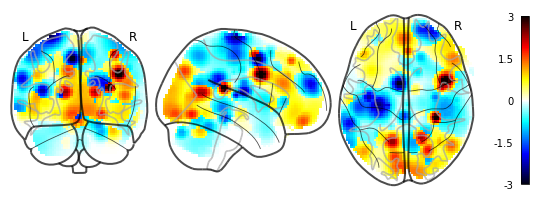

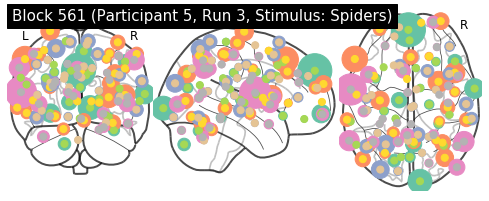

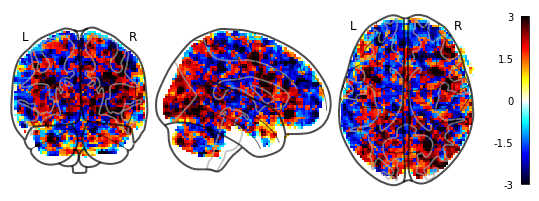

01/24/2020 23:08:28 Reconstruction Error (Frobenius Norm): 1.37596326e+03 out of 1.47518005e+03


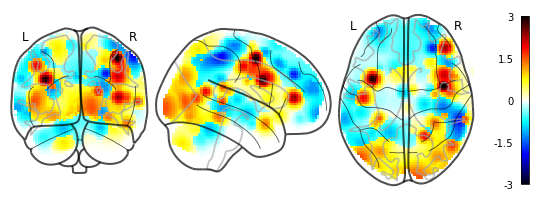

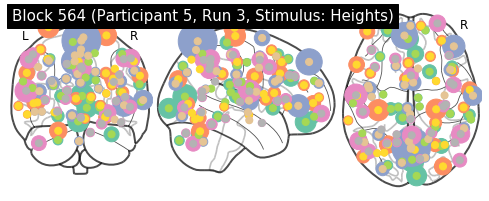

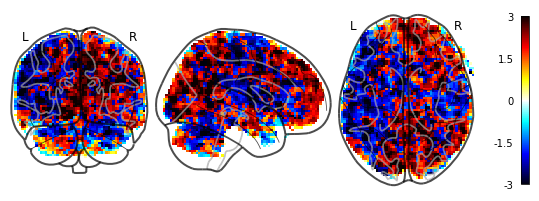

01/24/2020 23:08:33 Reconstruction Error (Frobenius Norm): 1.48822913e+03 out of 1.54144543e+03


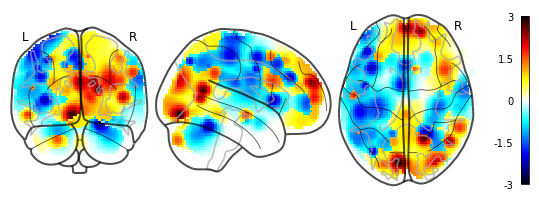

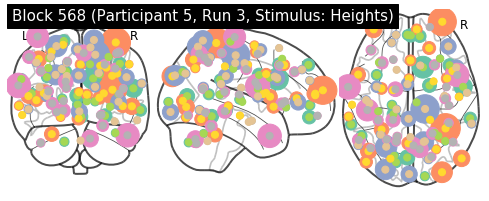

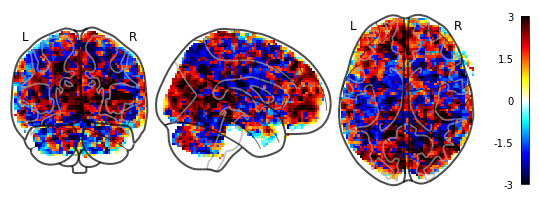

01/24/2020 23:08:37 Reconstruction Error (Frobenius Norm): 1.53445679e+03 out of 1.61199646e+03


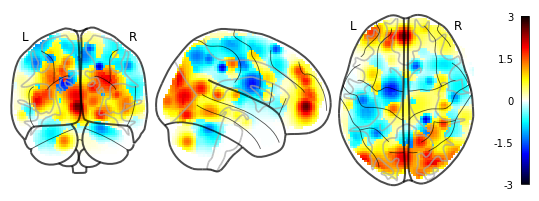

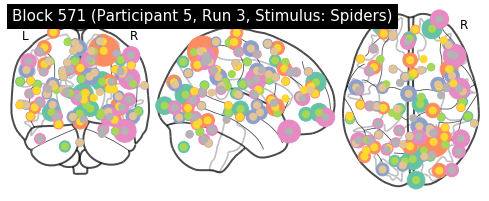

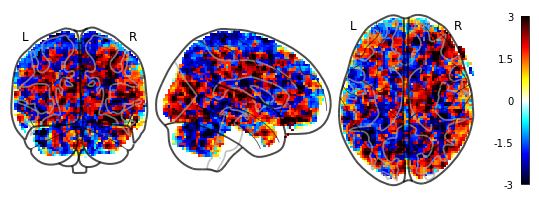

01/24/2020 23:08:42 Reconstruction Error (Frobenius Norm): 1.44119910e+03 out of 1.53582385e+03


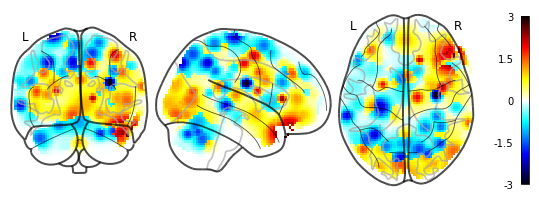

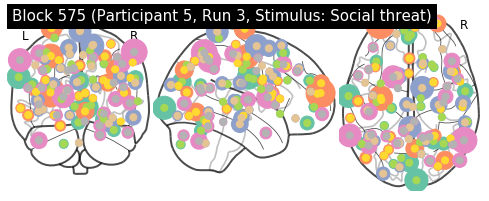

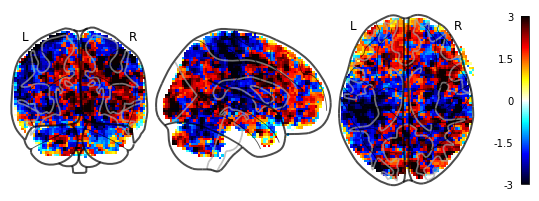

01/24/2020 23:08:47 Reconstruction Error (Frobenius Norm): 1.50607690e+03 out of 1.60650012e+03


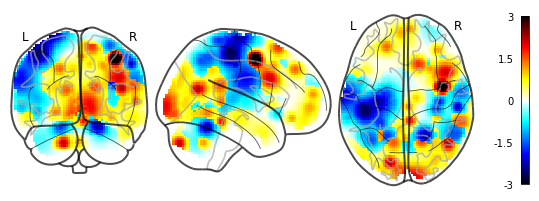

In [10]:
subject_runs = set([(block.subject, block.run) for block in htfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in htfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = htfa._blocks.index(block)
        htfa.plot_factor_centers(index, labeler=task_labeler)
        htfa.plot_original_brain(index)
        htfa.plot_reconstruction(index)


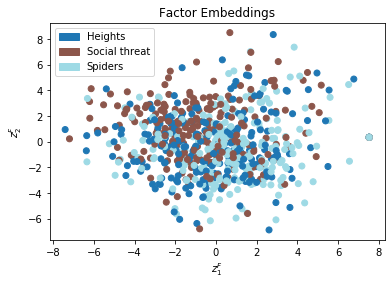

In [11]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='PCA')

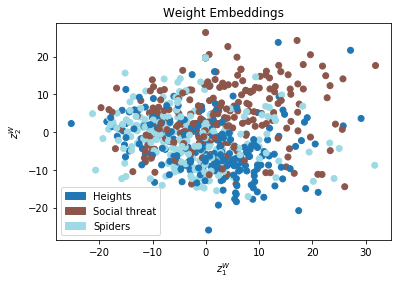

In [12]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='PCA')

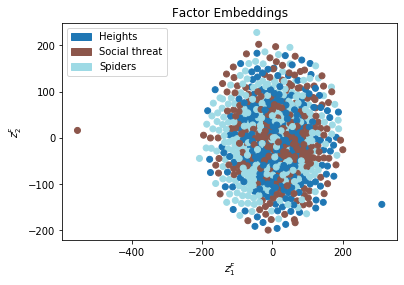

In [13]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='TSNE')

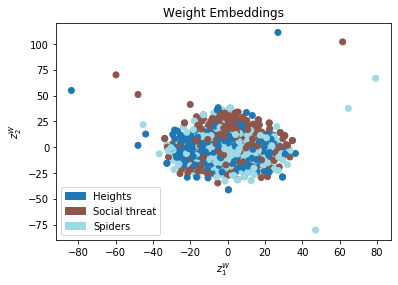

In [14]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='TSNE')

In [15]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=affvids_db.inference_filter(training=True))

01/25/2020 16:25:04 Average reconstruction error (MSE): 1.21262585e+03 +/- 4.65814818e+01
01/25/2020 16:25:04 Average data norm (Euclidean): 1.41246504e+03 +/- 8.13384631e+01
01/25/2020 16:25:04 Percent average reconstruction error: 85.984888 +/- 3.06365897e+00


(array([1238.34472656, 1166.56335449, 1268.91662598, 1252.52148438,
        1217.43530273, 1267.0357666 , 1162.88745117, 1246.55725098,
        1217.015625  , 1204.18408203, 1258.2479248 , 1276.34069824,
        1179.71240234, 1226.68066406, 1247.47558594, 1196.13354492,
        1229.57019043, 1224.69616699, 1235.53271484, 1231.63183594,
        1232.40429688, 1241.28808594, 1227.54455566, 1237.29321289,
        1225.60668945, 1282.56774902, 1183.20654297, 1288.90551758,
        1280.66796875, 1275.95397949, 1245.79797363, 1223.36706543,
        1201.72497559, 1199.92871094, 1199.75463867, 1237.16564941,
        1178.25769043, 1235.23095703, 1199.8170166 , 1152.79541016,
        1219.98059082, 1319.04089355, 1217.78979492, 1205.13916016,
        1313.43273926, 1375.82788086, 1208.45898438, 1194.30200195,
        1140.05151367, 1198.95715332, 1231.86328125, 1215.34033203,
        1319.78991699, 1200.40429688, 1257.1315918 , 1218.17248535,
        1178.63269043, 1202.05761719, 1156.25622